Enter your surface_area: 1000
Enter your postal code: N2T2K1
ac_monthly
[1623045.443890215, 2069552.610848546, 2318958.830095241, 2860261.131149781, 3543485.847425993, 152072.4000511059, 1512785.889958975, 3423292.77742849, 1575734.367985614, 2069829.744159161, 1644475.353061264, 1154481.841034163]
poa_monthly
[87.11612781811375, 114.0890639841044, 127.3781049209009, 164.6839545398286, 210.3008149367449, 11.78976343154512, 93.93772692674622, 210.5532360336871, 93.71561490710208, 118.9454139877388, 92.85398450823203, 63.88948915699042]
solrad_monthly
[2.810197671552057, 4.07460942800373, 4.108971126480674, 5.489465151327619, 6.783897256024029, 0.3929921143848373, 3.030249255701491, 6.792039872054424, 3.123853830236736, 3.836948838314156, 3.095132816941068, 2.060951263128723]
dc_monthly
[1707051.141729976, 2214227.648935446, 2435209.97540989, 3009077.010866683, 3712430.387582238, 194345.1743662507, 1608343.105158695, 3584801.873560803, 1665375.915857483, 2174033.097067838, 1729438.437921

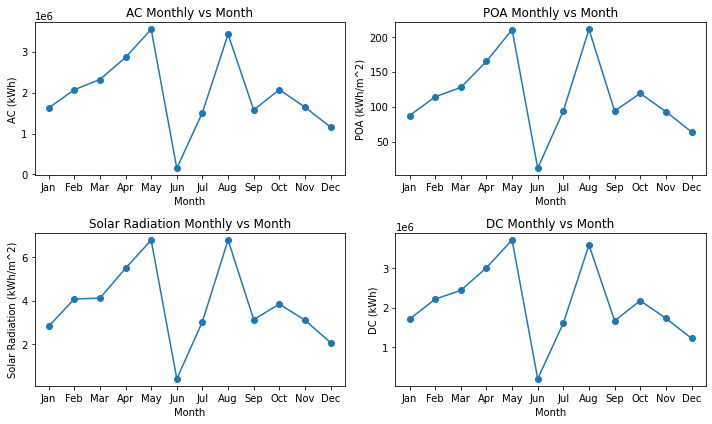

In [8]:
import requests
import matplotlib.pyplot as plt


# Get the inputs from the GUI
surface_area = float(input("Enter your surface_area: "))
#address = address_entry.get()
address = str(input("Enter your postal code: "))

array_type = 2
module_type = 1
system_loss = 14.3
tilt = 20

# Calculate system capacity
solar_cell_efficiency = 21.3  # [%]
conversion_factor = 1  # [KW / m^2]
system_capacity = surface_area * solar_cell_efficiency * conversion_factor

# Define the URL for the PVWatts V8 API
url = "https://developer.nrel.gov/api/pvwatts/v8.json"

# Specify the parameters for the API request
params = {
    "api_key": "rS4jhBrbjOjG2Rs1d2PZD6HGaIvO1gjDofyabEOV",
    "azimuth": 180,
    "system_capacity": system_capacity,
    "losses": system_loss,
    "array_type": array_type,
    "module_type": module_type,  
    "gcr": 0.4,
    "dc_ac_ratio": 1.2,
    "inv_eff": 96.0,
    "radius": 0,
    "timeframe": 'hourly',
    "dataset": "nsrdb",
    "tilt": tilt,
    "address": address,
    "soiling": "12|4|45|23|9|99|67|12.54|54|9|0|7.6",
    "albedo": 0.3,
    "bifaciality": 0.7
}

# Make the GET request to the PVWatts API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Display outputs
    ac_monthly = data["outputs"]["ac_monthly"]
    poa_monthly = data["outputs"]["poa_monthly"]
    solrad_monthly = data["outputs"]["solrad_monthly"]
    dc_monthly = data["outputs"]["dc_monthly"]
    
    
    print('ac_monthly')
    print(ac_monthly)
    
    print('poa_monthly')
    print(poa_monthly)
    
    print('solrad_monthly')
    print(solrad_monthly)
    
    print('dc_monthly')
    print(dc_monthly)
    

    # Plotting graphs
    months = [
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ]

    plt.close('all')
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.plot(months, ac_monthly, marker='o')
    plt.title('AC Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('AC (kWh)')

    plt.subplot(2, 2, 2)
    plt.plot(months, poa_monthly, marker='o')
    plt.title('POA Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('POA (kWh/m^2)')

    plt.subplot(2, 2, 3)
    plt.plot(months, solrad_monthly, marker='o')
    plt.title('Solar Radiation Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('Solar Radiation (kWh/m^2)')

    plt.subplot(2, 2, 4)
    plt.plot(months, dc_monthly, marker='o')
    plt.title('DC Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('DC (kWh)')

    plt.tight_layout()
    plt.show()

else:
    print('err')





Enter your surface_area: 1000
Enter your postal code: N2T2K1
ac_monthly
[1804804.0977181, 2122547.078373405, 3522891.059704046, 3484297.610705242, 3863288.808973658, 4121919.185073823, 4298572.053870505, 3872879.590430121, 3293555.364435604, 2264440.703987484, 1644475.353061264, 1240874.531962636]
poa_monthly
[97.60248993984239, 118.2368343122822, 211.1929994263353, 210.0674855013018, 230.2677576739165, 251.3099971123299, 267.7896602878092, 239.5334055607219, 196.4932540927803, 130.3005812565761, 92.85398450823203, 68.63207040914911]
solrad_monthly
[3.14846741741427, 4.222744082581508, 6.812677400849527, 7.002249516710061, 7.427992183029565, 8.376999903744329, 8.638376138316426, 7.726884050345869, 6.54977513642601, 4.203244556663745, 3.095132816941068, 2.213937755133842]
dc_monthly
[1906290.994019177, 2292329.932959714, 3968671.746998232, 3797984.353847079, 4048996.762484135, 4315745.544707073, 4499327.483603458, 4051430.661526939, 3446678.910476061, 2375807.405276315, 1729438.43792180

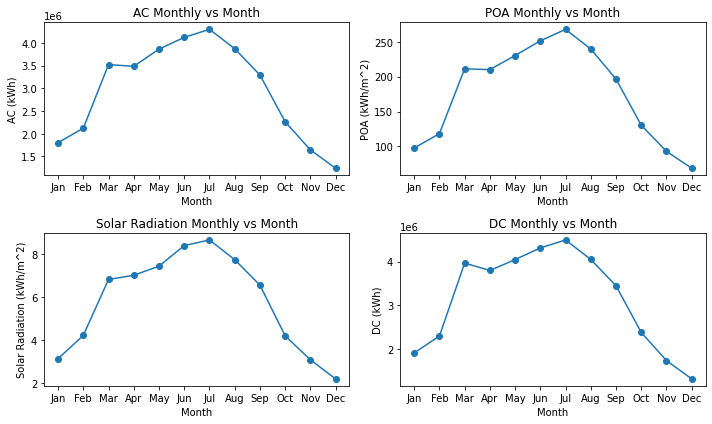

In [10]:
import requests
import matplotlib.pyplot as plt

# Get the inputs from the GUI
surface_area = float(input("Enter your surface_area: "))
address = str(input("Enter your postal code: "))

array_type = 2
module_type = 1
system_loss = 14.3
tilt = 20

# Calculate system capacity
solar_cell_efficiency = 21.3  # [%]
conversion_factor = 1  # [KW / m^2]
system_capacity = surface_area * solar_cell_efficiency * conversion_factor

# Define the URL for the PVWatts V8 API
url = "https://developer.nrel.gov/api/pvwatts/v8.json"

# Specify the parameters for the API request
params = {
    "api_key": "rS4jhBrbjOjG2Rs1d2PZD6HGaIvO1gjDofyabEOV",
    "azimuth": 180,
    "system_capacity": system_capacity,
    "losses": system_loss,
    "array_type": array_type,
    "module_type": module_type,
    "gcr": 0.4,
    "dc_ac_ratio": 1.2,
    "inv_eff": 96.0,
    "radius": 0,
    "timeframe": 'hourly',
    "dataset": "nsrdb",
    "tilt": tilt,
    "address": address,
    "albedo": 0.3,
    "bifaciality": 0.7
}

# Make the GET request to the PVWatts API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Display outputs
    ac_monthly = data["outputs"]["ac_monthly"]
    poa_monthly = data["outputs"]["poa_monthly"]
    solrad_monthly = data["outputs"]["solrad_monthly"]
    dc_monthly = data["outputs"]["dc_monthly"]

    print('ac_monthly')
    print(ac_monthly)

    print('poa_monthly')
    print(poa_monthly)

    print('solrad_monthly')
    print(solrad_monthly)

    print('dc_monthly')
    print(dc_monthly)

    # Ensure any existing plots are closed before creating new ones
    plt.close('all')

    # Plotting graphs
    months = [
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ]

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.plot(months, ac_monthly, marker='o')
    plt.title('AC Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('AC (kWh)')

    plt.subplot(2, 2, 2)
    plt.plot(months, poa_monthly, marker='o')
    plt.title('POA Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('POA (kWh/m^2)')

    plt.subplot(2, 2, 3)
    plt.plot(months, solrad_monthly, marker='o')
    plt.title('Solar Radiation Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('Solar Radiation (kWh/m^2)')

    plt.subplot(2, 2, 4)
    plt.plot(months, dc_monthly, marker='o')
    plt.title('DC Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('DC (kWh)')

    plt.tight_layout()
    plt.show()

else:
    print('Error:', response.status_code)


Enter your surface_area: 3000
Enter your postal code: N2T2K1
ac_monthly
[5414248.361614785, 6367470.202195455, 10568457.31880799, 10452800.41585767, 11589783.99347157, 12365663.4893968, 12895621.78011738, 11618553.95800104, 9880591.52257682, 6793273.97494119, 4933387.078233831, 3722534.838641022]
poa_monthly
[97.59877271559786, 118.2322849978579, 211.1844220515568, 210.0636049348376, 230.2657674195163, 251.3076961779587, 267.7873017044091, 239.5312907508821, 196.491498511817, 130.2995006411651, 92.85313193747466, 68.63018983475239]
solrad_monthly
[3.14834750695477, 4.222581607066355, 6.81240071134054, 7.002120164494587, 7.42792798127472, 8.376923205931957, 8.638300054980938, 7.726815830673616, 6.549716617060567, 4.203209698102098, 3.095104397915822, 2.213877091443625]
dc_monthly
[5718690.938255383, 6876766.394687606, 11905614.80530234, 11393780.66501556, 12146902.43686175, 12947137.87122706, 13497883.6056683, 12154203.29518513, 10339959.41236755, 7127372.30419922, 5188274.888123954, 39

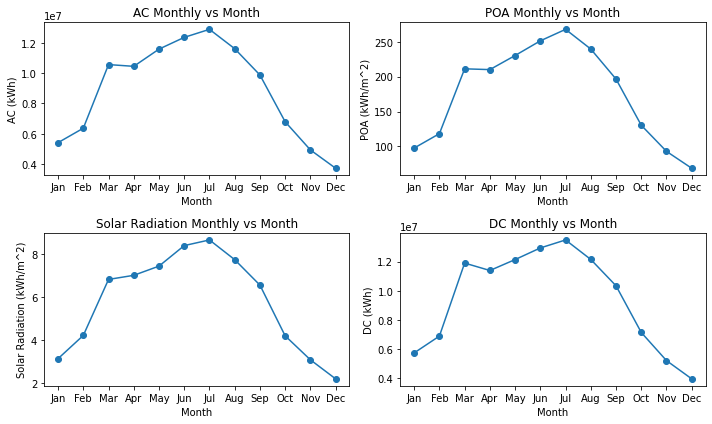

In [11]:
import requests
import matplotlib.pyplot as plt

# Get the inputs from the GUI
surface_area = float(input("Enter your surface_area: "))
address = str(input("Enter your postal code: "))

array_type = 2
module_type = 1
system_loss = 14.3
tilt = 20

# Calculate system capacity
solar_cell_efficiency = 21.3  # [%]
conversion_factor = 1  # [KW / m^2]
system_capacity = surface_area * solar_cell_efficiency * conversion_factor

# Define the URL for the PVWatts V8 API
url = "https://developer.nrel.gov/api/pvwatts/v8.json"

# Specify the parameters for the API request
params = {
    "api_key": "rS4jhBrbjOjG2Rs1d2PZD6HGaIvO1gjDofyabEOV",
    "azimuth": 180,
    "system_capacity": system_capacity,
    "losses": system_loss,
    "array_type": array_type,
    "module_type": module_type,
    "gcr": 0.4,
    "dc_ac_ratio": 1.2,
    "inv_eff": 96.0,
    "radius": 0,
    "timeframe": 'hourly',
    "dataset": "nsrdb",
    "tilt": tilt,
    "address": address,
    "albedo": 0.3,
    "bifaciality": 0.7
}

# Make the GET request to the PVWatts API
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Display outputs
    ac_monthly = data["outputs"]["ac_monthly"]
    poa_monthly = data["outputs"]["poa_monthly"]
    solrad_monthly = data["outputs"]["solrad_monthly"]
    dc_monthly = data["outputs"]["dc_monthly"]

    print('ac_monthly')
    print(ac_monthly)

    print('poa_monthly')
    print(poa_monthly)

    print('solrad_monthly')
    print(solrad_monthly)

    print('dc_monthly')
    print(dc_monthly)

    # Ensure any existing plots are closed before creating new ones
    plt.close('all')

    # Plotting graphs
    months = [
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ]

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 2, 1)
    plt.plot(months, ac_monthly, marker='o')
    plt.title('AC Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('AC (kWh)')

    plt.subplot(2, 2, 2)
    plt.plot(months, poa_monthly, marker='o')
    plt.title('POA Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('POA (kWh/m^2)')

    plt.subplot(2, 2, 3)
    plt.plot(months, solrad_monthly, marker='o')
    plt.title('Solar Radiation Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('Solar Radiation (kWh/m^2)')

    plt.subplot(2, 2, 4)
    plt.plot(months, dc_monthly, marker='o')
    plt.title('DC Monthly vs Month')
    plt.xlabel('Month')
    plt.ylabel('DC (kWh)')

    plt.tight_layout()
    plt.show()

else:
    print('Error:', response.status_code)
